## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [68]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

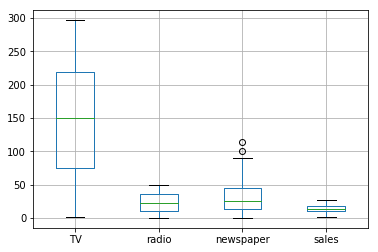

In [10]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

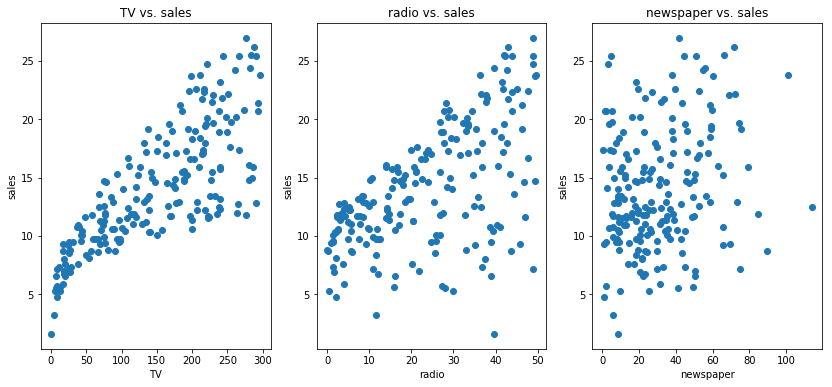

In [30]:
fg = plt.figure(figsize=(14,6))
ax1 = fg.add_subplot(1,3,1)
plt.scatter(df['TV'], df['sales'])
ax1.set_xlabel('TV')
ax1.set_ylabel('sales')
ax1.set_title('TV vs. sales')
ax2 = fg.add_subplot(1,3,2)
plt.scatter(df['radio'], df['sales'])
ax2.set_xlabel('radio')
ax2.set_ylabel('sales')
ax2.set_title('radio vs. sales')
plt.scatter(df['newspaper'], df['sales'])
ax3 = fg.add_subplot(1,3,3)
ax3.set_xlabel('newspaper')
ax3.set_ylabel('sales')
ax3.set_title('newspaper vs. sales')
plt.show()

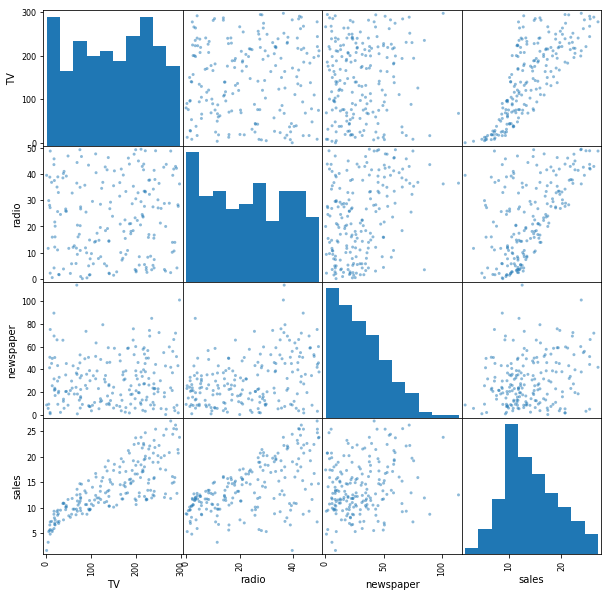

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Answer: Based on the above correlation matrix, we can find there are strong positive correlation patterns in the TV vs. sales plot and radio vs. sales plot. As for the other plots, we cannot find any obvious pattern. Therefore, we can conclude that TV and radio are strongly correlated with sales. And the correlation between any other variables are not obvious.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [31]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [32]:
y = df['sales']

b) Set X to be just the features described above in df

In [66]:
X = df[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


c) Randomly split data into training and testing - 80% training, 20% testing.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [45]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([ 16.4080242 ,  20.88988209,  21.55384318,  10.60850256,
        22.11237326,  13.10559172,  21.05719192,   7.46101034,
        13.60634581,  15.15506967,   9.04831992,   6.65328312,
        14.34554487,   8.90349333,   9.68959028,  12.16494386,
         8.73628397,  16.26507258,  10.27759582,  18.83109103,
        19.56036653,  13.25103464,  12.33620695,  21.30695132,
         7.82740305,   5.80957448,  20.75753231,  11.98138077,
         9.18349576,   8.5066991 ,  12.46646769,  10.00337695,
        21.3876709 ,  12.24966368,  18.26661538,  20.13766267,
        14.05514005,  20.85411186,  11.0174441 ,   4.56899622])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [54]:
print('R^2: %.3f' %regr.score(X_test, y_test))

R^2: 0.899


Based on the above output, we can get the R^2 on testing data is 0.899. This is good since the R^2 is relatively large.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

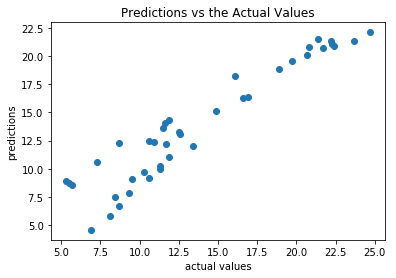

In [60]:
plt.scatter(regr.predict(X_test), y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.title('Predictions vs the Actual Values')
plt.show()

Based on the above plot, we can conclude the model looks like a good model since the line in the plot is appromately 45-degree linear.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Answer: We can measure the importance of features in this model by the size of its corresponding coefficient. Before making concludesions, we should first standarize our data to get the standarized coefficient and remove the collinear feature.

In [64]:
regr.coef_

array([ 0.04472952,  0.18919505,  0.00276111])

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [ ]:
We can find the TV has 

In [69]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)
X2


array([[  9.69852266e-01,   9.81522472e-01,   1.77894547e+00],
       [ -1.19737623e+00,   1.08280781e+00,   6.69578760e-01],
       [ -1.51615499e+00,   1.52846331e+00,   1.78354865e+00],
       [  5.20496822e-02,   1.21785493e+00,   1.28640506e+00],
       [  3.94182198e-01,  -8.41613655e-01,   1.28180188e+00],
       [ -1.61540845e+00,   1.73103399e+00,   2.04592999e+00],
       [ -1.04557682e+00,   6.43904671e-01,  -3.24708413e-01],
       [ -3.13436589e-01,  -2.47406325e-01,  -8.72486994e-01],
       [ -1.61657614e+00,  -1.42906863e+00,  -1.36042422e+00],
       [  6.16042873e-01,  -1.39530685e+00,  -4.30581584e-01],
       [ -9.45155670e-01,  -1.17923146e+00,  -2.92486143e-01],
       [  7.90028350e-01,   4.96973404e-02,  -1.22232878e+00],
       [ -1.43908760e+00,   7.99208859e-01,   1.62704048e+00],
       [ -5.78501712e-01,  -1.05768905e+00,  -1.07502697e+00],
       [  6.66253447e-01,   6.50657027e-01,   7.11007392e-01],
       [  5.64664612e-01,   1.65000572e+00,   1.0286269

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [ ]:
# Type your answer here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


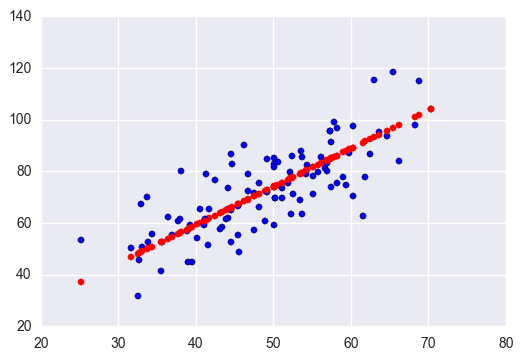

In [54]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

In [48]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.